In [1]:
import nltk
import pandas as pd
import re

In [2]:
text = pd.read_csv('Data/dataset.csv')

In [3]:
text.head()

,movie_name,script
0,12 Monkeys,Twelve MonkeysTWELVE MONKEYS An o...
1,2001 A Space Odyssey,2001: A SPACE ODYSSEY Screenplay ...
2,2012,...
3,28 Days Later,28 DAYS LATER ...
4,9,...


In [4]:
text.dropna(inplace=True)

In [5]:
text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   movie_name  165 non-null    object
 1   script      165 non-null    object
dtypes: object(2)
memory usage: 3.9+ KB


# pre-processing

In [7]:
import nltk
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer

In [8]:
stop_words = stopwords.words('english')
# stop_words.extend(['int','ext','im','one','contd'])

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/anna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
def tokenize_list(texts):
    word_list = []
    for item in range(len(texts)):
        
        word_list.append(nltk.word_tokenize(texts[item]))
    return word_list

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    for item in range(len(text)):
        text[item]=  [lemmatizer.lemmatize(w,pos='v') for w in text[item]]
        
    return text

In [12]:
text_list = tokenize_list(text.script.tolist())
text_list = remove_stopwords(text_list)
text_list = lemmatize(text_list)

In [13]:
len(text_list)

165

In [14]:
import gensim.corpora as corpora

# Create dictionary
id2word = corpora.Dictionary(text_list)


# Create corpus: Word frequency 
corpus = [id2word.doc2bow(text) for text in text_list]

# View
print(corpus[:1][0][:30])

[(0, 3), (1, 1), (2, 1), (3, 4), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 4), (14, 2), (15, 2), (16, 1), (17, 1), (18, 1), (19, 2), (20, 3), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 15)]


In [52]:
from tqdm import tqdm
from gensim.models.ldamulticore import LdaMulticore
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 14/14 [05:26<00:00, 23.31s/it]


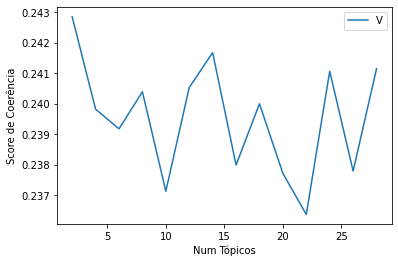

A quantidade de tópicos = 2  tem um valor de coerência de  0.2429
A quantidade de tópicos = 4  tem um valor de coerência de  0.2398
A quantidade de tópicos = 6  tem um valor de coerência de  0.2392
A quantidade de tópicos = 8  tem um valor de coerência de  0.2404
A quantidade de tópicos = 10  tem um valor de coerência de  0.2371
A quantidade de tópicos = 12  tem um valor de coerência de  0.2405
A quantidade de tópicos = 14  tem um valor de coerência de  0.2417
A quantidade de tópicos = 16  tem um valor de coerência de  0.238
A quantidade de tópicos = 18  tem um valor de coerência de  0.24
A quantidade de tópicos = 20  tem um valor de coerência de  0.2377
A quantidade de tópicos = 22  tem um valor de coerência de  0.2364
A quantidade de tópicos = 24  tem um valor de coerência de  0.2411
A quantidade de tópicos = 26  tem um valor de coerência de  0.2378
A quantidade de tópicos = 28  tem um valor de coerência de  0.2412


In [53]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=5):
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model = LdaMulticore(corpus, id2word=id2word, num_topics=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
# Colocando parametros na função
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=text_list, start=2, limit=30, step=2)
# Mostrando visualmente a quantidade de tópicos
limit=30; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Tópicos")
plt.ylabel("Score de Coerência")
plt.legend(("Valores de Coerência"), loc='best')
plt.show()
# Lista dos valores de coerência, para melhor identificar o ponto de inflexão do gráfico
for m, cv in zip(x, coherence_values):
    print("A quantidade de tópicos =", m, " tem um valor de coerência de ", round(cv, 4))

In [17]:
#https://medium.com/somos-tera/como-modelar-t%C3%B3picos-atrav%C3%A9s-de-latent-dirichlet-allocation-lda-atrav%C3%A9s-da-biblioteca-gensim-1fa17357ad4b

In [61]:
# number of topics
num_topics = 4

# Build LDA model
lda_model = LdaMulticore(corpus=corpus,
                        id2word=id2word,
                        num_topics=num_topics, 
                        random_state=42,
                        chunksize=100,
                        passes=10,
                        per_word_topics=True,
                        alpha = 1,
                        eta = 0.2)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.008*"look" + 0.006*"int" + 0.006*"get" + 0.006*"back" + 0.006*"see" + '
  '0.005*"go" + 0.005*"continue" + 0.005*"one" + 0.005*"ext" + 0.004*"like"'),
 (1,
  '0.008*"look" + 0.006*"int" + 0.006*"get" + 0.006*"go" + 0.005*"back" + '
  '0.005*"see" + 0.004*"man" + 0.004*"know" + 0.004*"one" + 0.004*"like"'),
 (2,
  '0.008*"look" + 0.007*"get" + 0.006*"int" + 0.006*"back" + 0.006*"go" + '
  '0.006*"see" + 0.005*"one" + 0.004*"like" + 0.004*"ext" + 0.004*"come"'),
 (3,
  '0.008*"look" + 0.008*"int" + 0.006*"get" + 0.006*"go" + 0.006*"back" + '
  '0.005*"see" + 0.004*"ext" + 0.004*"one" + 0.004*"like" + 0.004*"sam"')]


In [62]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=text_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.24186394994275523


In [63]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('Data/prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'Data/prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/anna/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.021573  0.057037       1        1  26.117867
1      0.065076 -0.010553       2        1  18.918971
2     -0.001523 -0.000845       3        1  27.507305
3     -0.041981 -0.045638       4        1  27.455857, topic_info=         Term         Freq        Total Category  logprob  loglift
23647   logan  2147.000000  2147.000000  Default  30.0000  30.0000
14016     sam  2777.000000  2777.000000  Default  29.0000  29.0000
38252    kirk  1793.000000  1793.000000  Default  28.0000  28.0000
2373      joe  1411.000000  1411.000000  Default  27.0000  27.0000
23652    luke  1380.000000  1380.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
280    around  1803.867037  6507.607122   Topic4  -5.8306   0.0096
365      away  1652.754142  5492.945210   Topic4  -5.9181   0.0916
1935     head  1725.734595  6557.321108   Topic4  -5.8749  -0.0423
1486     face  1611.878933  6244.865539   Topic4  -5.9431  -0.0618
5481    contd  1578.767321  5395.563394   Topic4  -5.9639   0.0637

[377 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
7111       1  0.029189    adam
7111       2  0.021405    adam
7111       3  0.005838    adam
7111       4  0.943780    adam
8259       1  0.969187    alex
...      ...       ...     ...
65893      4  0.006343   zaius
47133      1  0.003594  zaphod
47133      2  0.007189  zaphod
47133      3  0.988473  zaphod
47133      4  0.003594  zaphod

[996 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4])

In [ ]:
topic_scores = [[topic_score[1] for topic_score in sent] for sent in doc_lda]